# Defining the problem statement
Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

# Column Profiling:
1. data - tells whether the data is testing or training data
2. trip_creation_time – Timestamp of trip creation
3. route_schedule_uuid – Unique Id for a particular route schedule
4. route_type – Transportation type
5. FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
    Carting: Handling system consisting of small vehicles (carts)
6. trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
7. source_center - Source ID of trip origin
8. source_name - Source Name of trip origin
9. destination_cente – Destination ID
10. destination_name – Destination Name
11. od_start_time – Trip start time
12. od_end_time – Trip end time
13. start_scan_to_end_scan – Time taken to deliver from source to destination
14. is_cutoff – Unknown field
15. cutoff_factor – Unknown field
16. cutoff_timestamp – Unknown field
17. actual_distance_to_destination – Distance in Kms between source and destination warehouse
18. actual_time – Actual time taken to complete the delivery (Cumulative)
19. osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
20. osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
21. factor – Unknown field
22. segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
23. segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
24. segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
25. segment_factor – Unknown field

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("delhivery_data.csv")

In [3]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


## Exploratory data analysis

In [4]:
df.shape

(144867, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [7]:
#For Numerical columns
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [8]:
#For categorical columns
df.describe(include = ['object'])

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369,93180
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,2018-09-24 05:19:20
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,40


In [9]:
df.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   93180
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
dtype: int64

### Data Cleaning

#### Removing all the unknown fields & type conversion

In [10]:
df.dropna(how='any', inplace=True)
df.reset_index(drop=True, inplace=True)

In [11]:
df.drop(['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor'], axis=1, inplace=True)

In [12]:
df['route_type'] = df['route_type'].astype('category')
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])

In [13]:
df.head(3)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152


## Building new features

### Aggregate on segment_key = trip_uuid + source_id + destination_id

In [14]:
df['segment_key'] = df['trip_uuid'] + df['source_center'] + df['destination_center']
segment_cols = ['segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']

for col in segment_cols:
  df[col + '_sum'] = df.groupby(['segment_key'])[col].cumsum()

df[['segment_key'] + [col + '_sum' for col in segment_cols]]

,segment_key,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,trip-153741093647649320IND388121AAAIND388620AAB,14.0,11.0,11.9653
1,trip-153741093647649320IND388121AAAIND388620AAB,24.0,20.0,21.7243
2,trip-153741093647649320IND388121AAAIND388620AAB,40.0,27.0,32.5395
3,trip-153741093647649320IND388121AAAIND388620AAB,61.0,39.0,45.5619
4,trip-153741093647649320IND388121AAAIND388620AAB,67.0,44.0,49.4772
...,...,...,...,...
144311,trip-153746066843555182IND131028AABIND000000ACB,92.0,94.0,65.3487
144312,trip-153746066843555182IND131028AABIND000000ACB,118.0,115.0,82.7212
144313,trip-153746066843555182IND131028AABIND000000ACB,138.0,149.0,103.4265
144314,trip-153746066843555182IND131028AABIND000000ACB,155.0,176.0,122.3150


In [15]:
df['data'].value_counts()

training    104632
test         39684
Name: data, dtype: int64

In [16]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_key',
       'segment_actual_time_sum', 'segment_osrm_time_sum',
       'segment_osrm_distance_sum'],
      dtype='object')

In [17]:
create_segment_dict = {
    'data': 'first',
    'trip_creation_time': 'first', 
    'route_schedule_uuid': 'first',
    'route_type': 'first',
    'trip_uuid': 'first', 
    'source_center': 'first', 
    'source_name': 'first', 
    
    'destination_center': 'last',
    'destination_name': 'last', 

    'od_start_time': 'first', 
    'od_end_time': 'first',
    'start_scan_to_end_scan': 'first', 

    'actual_distance_to_destination': 'last',
    'actual_time': 'last', 

    'osrm_time': 'last', 
    'osrm_distance': 'last', 

    'segment_actual_time_sum': 'last',
    'segment_osrm_time_sum': 'last', 
    'segment_osrm_distance_sum': 'last'
}

In [18]:
segment = df.groupby('segment_key').agg(create_segment_dict).reset_index()
segment = segment.sort_values(by=['segment_key', 'od_end_time'], ascending=True).reset_index()
segment.head()

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,...,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,...,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,...,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,...,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,...,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408


In [19]:
segment[segment['trip_uuid']=='trip-153741093647649320']

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
10370,10370,trip-153741093647649320IND388121AAAIND388620AAB,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,...,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,67.0,44.0,49.4772
10371,10371,trip-153741093647649320IND388620AABIND388320AAA,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,...,2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,100.0,44.0,53.2334


In [20]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           26222 non-null  int64         
 1   segment_key                     26222 non-null  object        
 2   data                            26222 non-null  object        
 3   trip_creation_time              26222 non-null  datetime64[ns]
 4   route_schedule_uuid             26222 non-null  object        
 5   route_type                      26222 non-null  category      
 6   trip_uuid                       26222 non-null  object        
 7   source_center                   26222 non-null  object        
 8   source_name                     26222 non-null  object        
 9   destination_center              26222 non-null  object        
 10  destination_name                26222 non-null  object        
 11  od

In [21]:
segment['od_time_diff_hour'] = (segment['od_end_time'] - segment['od_start_time']).dt.total_seconds() / 60
segment[['od_time_diff_hour']]

,od_time_diff_hour
0,1260.604421
1,999.505379
2,58.832388
3,122.779486
4,834.638929
...,...
26217,62.115193
26218,91.087797
26219,44.174403
26220,287.474007


### Aggregate on trip_uuid

In [22]:
segment.columns

Index(['index', 'segment_key', 'data', 'trip_creation_time',
       'route_schedule_uuid', 'route_type', 'trip_uuid', 'source_center',
       'source_name', 'destination_center', 'destination_name',
       'od_start_time', 'od_end_time', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_time_sum',
       'segment_osrm_distance_sum', 'od_time_diff_hour'],
      dtype='object')

In [23]:
create_trip_dict = {
    'data': 'first',
    'trip_creation_time': 'first', 
    'route_schedule_uuid': 'first',
    'route_type': 'first',
    'trip_uuid': 'first', 

    'source_center': 'first', 
    'source_name': 'first', 
    
    'destination_center': 'last',
    'destination_name': 'last', 

    'start_scan_to_end_scan': 'sum', 
    'od_time_diff_hour': 'sum',

    'actual_distance_to_destination': 'sum',
    'actual_time': 'sum', 

    'osrm_time': 'sum', 
    'osrm_distance': 'sum', 

    'segment_actual_time_sum': 'sum',
    'segment_osrm_time_sum': 'sum', 
    'segment_osrm_distance_sum': 'sum'
}

In [24]:
trip = segment.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop=True)
trip.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919


In [25]:
trip[['actual_time', 'segment_actual_time_sum']].head()

,actual_time,segment_actual_time_sum
0,1562.0,1548.0
1,143.0,141.0
2,3347.0,3308.0
3,59.0,59.0
4,341.0,340.0


In [26]:
trip[trip['trip_uuid']=='trip-153741093647649320']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
5917,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),195.0,195.386819,82.981842,170.0,89.0,107.4515,167.0,88.0,102.7106


In [27]:
trip[['actual_distance_to_destination', 'osrm_distance']].head()

,actual_distance_to_destination,osrm_distance
0,824.732854,991.3523
1,73.186911,85.1110
2,1927.404273,2354.0665
3,17.175274,19.6800
4,127.448500,146.7918


In [28]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            14787 non-null  object        
 1   trip_creation_time              14787 non-null  datetime64[ns]
 2   route_schedule_uuid             14787 non-null  object        
 3   route_type                      14787 non-null  category      
 4   trip_uuid                       14787 non-null  object        
 5   source_center                   14787 non-null  object        
 6   source_name                     14787 non-null  object        
 7   destination_center              14787 non-null  object        
 8   destination_name                14787 non-null  object        
 9   start_scan_to_end_scan          14787 non-null  float64       
 10  od_time_diff_hour               14787 non-null  float64       
 11  ac

In [29]:
trip['source_name'].value_counts()

Gurgaon_Bilaspur_HB (Haryana)           1052
Bhiwandi_Mankoli_HB (Maharashtra)        697
Bangalore_Nelmngla_H (Karnataka)         624
Bengaluru_Bomsndra_HB (Karnataka)        455
Pune_Tathawde_H (Maharashtra)            396
                                        ... 
Beed_JalnaRd_D (Maharashtra)               1
Bijapur_KirtiNgr_D (Karnataka)             1
Murshidabad_Sirjudol_D (West Bengal)       1
Lalitpur_RjghatRd_D (Uttar Pradesh)        1
Sandur_WrdN1DPP_D (Karnataka)              1
Name: source_name, Length: 930, dtype: int64

In [30]:
trip.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'start_scan_to_end_scan', 'od_time_diff_hour',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_time_sum',
       'segment_osrm_distance_sum'],
      dtype='object')

In [31]:
trip[['trip_creation_time', 'source_name', 'destination_name']]

,trip_creation_time,source_name,destination_name
0,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh)
1,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka)
2,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana)
3,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra)
4,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka)
...,...,...,...
14782,2018-10-03 23:55:56.258533,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab)
14783,2018-10-03 23:57:23.863155,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana)
14784,2018-10-03 23:57:44.429324,Kanpur_GovndNgr_DC (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh)
14785,2018-10-03 23:59:14.390954,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu)


### Split and extract features out of source & destination. City-place-code (State)

In [32]:
trip['source_state'] = trip['source_name'].str.split('(').str[1].str[:-1].str.strip()
trip['source_city'] = trip['source_name'].str.split('(').str[0].str.split('_').str[0].str.strip()
trip['destination_state'] = trip['destination_name'].str.split('(').str[1].str[:-1].str.strip()
trip['destination_city'] = trip['destination_name'].str.split('(').str[0].str.split('_').str[0].str.strip()
trip[['source_city', 'source_state', 'destination_city', 'destination_state']]

,source_city,source_state,destination_city,destination_state
0,Kanpur,Uttar Pradesh,Kanpur,Uttar Pradesh
1,Doddablpur,Karnataka,Doddablpur,Karnataka
2,Gurgaon,Haryana,Gurgaon,Haryana
3,Mumbai Hub,Maharashtra,Mumbai,Maharashtra
4,Bellary,Karnataka,Sandur,Karnataka
...,...,...,...,...
14782,Chandigarh,Punjab,Chandigarh,Punjab
14783,FBD,Haryana,Faridabad,Haryana
14784,Kanpur,Uttar Pradesh,Kanpur,Uttar Pradesh
14785,Tirunelveli,Tamil Nadu,Tirchchndr,Tamil Nadu


In [33]:
trip[trip['source_city'] == 'Bangalore']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,source_state,source_city,destination_state,destination_city
114,training,2018-09-12 02:43:11.452505,thanos::sroute:39928fa7-4ce7-4b78-8e00-c56e31d...,Carting,trip-153672019145222964,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND560048AAB,Bengaluru_Hoodi_IP (Karnataka),194.0,...,106.0,40.0,35.5419,105.0,47.0,39.3452,Karnataka,Bangalore,Karnataka,Bengaluru
119,training,2018-09-12 02:48:39.511821,thanos::sroute:96b260f5-7df0-4432-83c9-d8b8fd4...,Carting,trip-153672051951158256,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND560043AAC,HBR Layout PC (Karnataka),188.0,...,90.0,35.0,30.9114,89.0,35.0,29.8570,Karnataka,Bangalore,Karnataka,HBR Layout PC
124,training,2018-09-12 02:56:30.978959,thanos::sroute:074d77c8-bd46-46c6-a625-cb9e55b...,Carting,trip-153672099097862043,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND560078AAC,BLR_JPNagar_Pc (Karnataka),143.0,...,65.0,31.0,33.0930,64.0,55.0,54.7183,Karnataka,Bangalore,Karnataka,BLR
125,training,2018-09-12 02:56:53.091158,thanos::sroute:5a979b68-18ab-430b-8ef8-814741b...,Carting,trip-153672101309094813,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND560002AAA,Bengaluru_KHRoad_I (Karnataka),178.0,...,92.0,27.0,24.6239,91.0,29.0,27.1236,Karnataka,Bangalore,Karnataka,Bengaluru
136,training,2018-09-12 03:25:50.600701,thanos::sroute:91f94fcf-86c8-4eb1-9d3c-7a57527...,Carting,trip-153672275060033414,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND560060AAB,Bengaluru_Kengeri_IP (Karnataka),121.0,...,53.0,27.0,24.8317,53.0,27.0,24.8317,Karnataka,Bangalore,Karnataka,Bengaluru
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14626,test,2018-10-03 20:44:18.689692,thanos::sroute:bfdc9f03-a14d-4fcb-8509-77461e9...,Carting,trip-153859945868942255,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND560058AAB,Bengaluru_Peenya_IP (Karnataka),115.0,...,20.0,14.0,12.6313,20.0,16.0,14.3524,Karnataka,Bangalore,Karnataka,Bengaluru
14627,test,2018-10-03 20:44:49.709860,thanos::sroute:1416d24f-6275-4b21-9813-7d052ec...,Carting,trip-153859948970962698,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND560058AAD,Bengaluru_Peenya_L (Karnataka),279.0,...,48.0,20.0,15.5439,48.0,20.0,16.2059,Karnataka,Bangalore,Karnataka,Bengaluru
14634,test,2018-10-03 20:50:49.004009,thanos::sroute:ba9e36e6-3be9-4ed5-8f47-dd90a32...,Carting,trip-153859984900372976,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND560099AAB,Bengaluru_Bomsndra_HB (Karnataka),167.0,...,69.0,47.0,49.2681,69.0,59.0,55.0141,Karnataka,Bangalore,Karnataka,Bengaluru
14665,test,2018-10-03 21:39:56.456386,thanos::sroute:e8223c15-c8c5-4de8-89e1-a748a0a...,Carting,trip-153860279645612700,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND560300AAA,Bengaluru_KGAirprt_HB (Karnataka),158.0,...,74.0,47.0,37.3270,74.0,43.0,42.2541,Karnataka,Bangalore,Karnataka,Bengaluru


In [34]:
trip[trip['source_city'].apply(lambda x: len(x.split(' ')) > 1)]['source_city'].value_counts()

Mumbai Hub               300
HBR Layout PC             79
PNQ Pashan DPC            32
PNQ Vadgaon Sheri DPC     28
Mumbai Antop Hill         13
Bhopal MP Nagar           11
Ganga Nagar                4
Panaji Goa                 3
PNQ Rahatani DPC           2
Mumbai Mahim               1
Central Goa                1
Name: source_city, dtype: int64

In [35]:
trip[trip['destination_city'].apply(lambda x: len(x.split(' ')) > 1)]['destination_city'].value_counts()

Mumbai Hub               234
HBR Layout PC            133
PNQ Vadgaon Sheri DPC     48
PNQ Pashan DPC            41
PNQ Rahatani DPC          33
Bhopal MP Nagar           15
Ganga Nagar                6
Panaji Goa                 5
Central Goa                4
Pune Balaji Nagar          4
Mumbai Antop Hill          2
North Delhi                1
Name: destination_city, dtype: int64

In [36]:
city_name_fix = {
    'Mumbai Hub': 'Mumbai',
    'Mumbai Antop Hill': 'Mumbai',
    'Mumbai Mahim': 'Mumbai',
    'HBR Layout PC': 'Bangalore',
    'PNQ Pashan DPC': 'Pune',
    'PNQ Rahatani DPC': 'Pune',
    'Pune Balaji Nagar': 'Pune',
    'PNQ Vadgaon Sheri DPC': 'Vadgaonsheri',
    'Bhopal MP Nagar': 'Bhopal',
    'Panaji Goa': 'Panaji',
    'North Delhi': 'Delhi'
}
for index, fix_city in enumerate(city_name_fix):
  trip.replace(fix_city, city_name_fix[fix_city], inplace=True)

In [37]:
trip[trip['source_city'].apply(lambda x: len(x.split(' ')) > 1)]['source_city'].value_counts()

Ganga Nagar    4
Central Goa    1
Name: source_city, dtype: int64

In [38]:
trip[trip['destination_city'].apply(lambda x: len(x.split(' ')) > 1)]['destination_city'].value_counts()

Ganga Nagar    6
Central Goa    4
Name: destination_city, dtype: int64

### Extract features like month, year, day, hour from trip_creation_time

In [39]:
trip['trip_creation_month_name'] = trip['trip_creation_time'].dt.month_name()
trip['trip_creation_month'] = trip['trip_creation_time'].dt.month
trip['trip_creation_year'] = trip['trip_creation_time'].dt.year
trip['trip_creation_day'] = trip['trip_creation_time'].dt.day
trip['trip_creation_hour'] = trip['trip_creation_time'].dt.hour
trip['trip_creation_dayofweek'] = trip['trip_creation_time'].dt.dayofweek
trip['trip_creation_week'] = trip['trip_creation_time'].dt.isocalendar().week
trip[['trip_creation_month_name', 'trip_creation_month', 'trip_creation_year', 'trip_creation_day', 'trip_creation_hour', 'trip_creation_dayofweek', 'trip_creation_week']]

,trip_creation_month_name,trip_creation_month,trip_creation_year,trip_creation_day,trip_creation_hour,trip_creation_dayofweek,trip_creation_week
0,September,9,2018,12,0,2,37
1,September,9,2018,12,0,2,37
2,September,9,2018,12,0,2,37
3,September,9,2018,12,0,2,37
4,September,9,2018,12,0,2,37
...,...,...,...,...,...,...,...
14782,October,10,2018,3,23,2,40
14783,October,10,2018,3,23,2,40
14784,October,10,2018,3,23,2,40
14785,October,10,2018,3,23,2,40


## Visual Analysis

<AxesSubplot:>

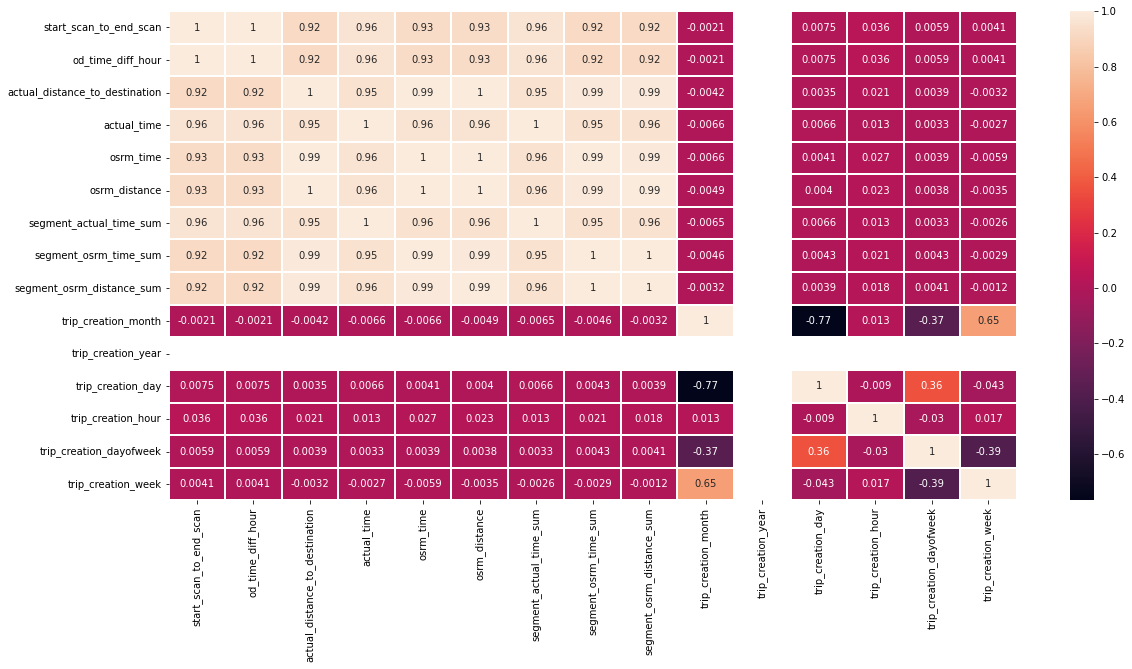

In [40]:
plt.figure(figsize=(19,9))
sns.heatmap(trip.corr(), annot=True, linewidths=0.01)

#### It is a highly correlated data, all the fields are realted to each other.

In [41]:
trip[['route_type']].describe(include=['category'])

,route_type
count,14787
unique,2
top,Carting
freq,8906


<AxesSubplot:ylabel='route_type'>

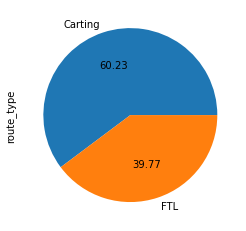

In [42]:
trip['route_type'].value_counts().plot(kind='pie', autopct='%.2f')

#### Carting to FTL ratio is 60:40 almost.

In [43]:
trip.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'start_scan_to_end_scan', 'od_time_diff_hour',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_time_sum',
       'segment_osrm_distance_sum', 'source_state', 'source_city',
       'destination_state', 'destination_city', 'trip_creation_month_name',
       'trip_creation_month', 'trip_creation_year', 'trip_creation_day',
       'trip_creation_hour', 'trip_creation_dayofweek', 'trip_creation_week'],
      dtype='object')

### State

<AxesSubplot:xlabel='count', ylabel='source_state'>

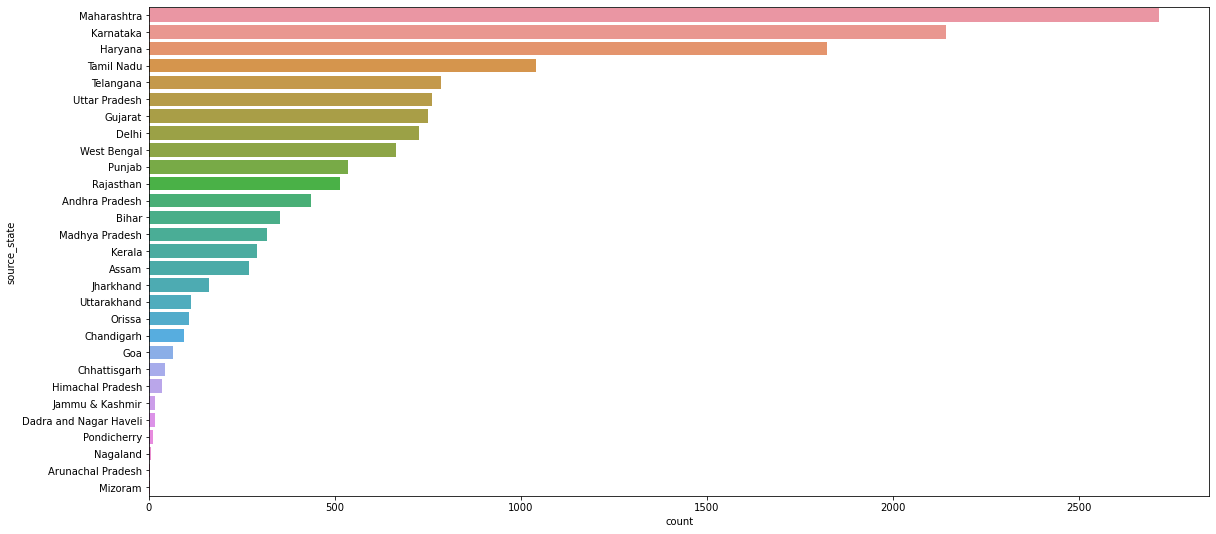

In [44]:
plt.figure(figsize=(19,9))
sns.countplot(y='source_state', data=trip, order = trip['source_state'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='destination_state'>

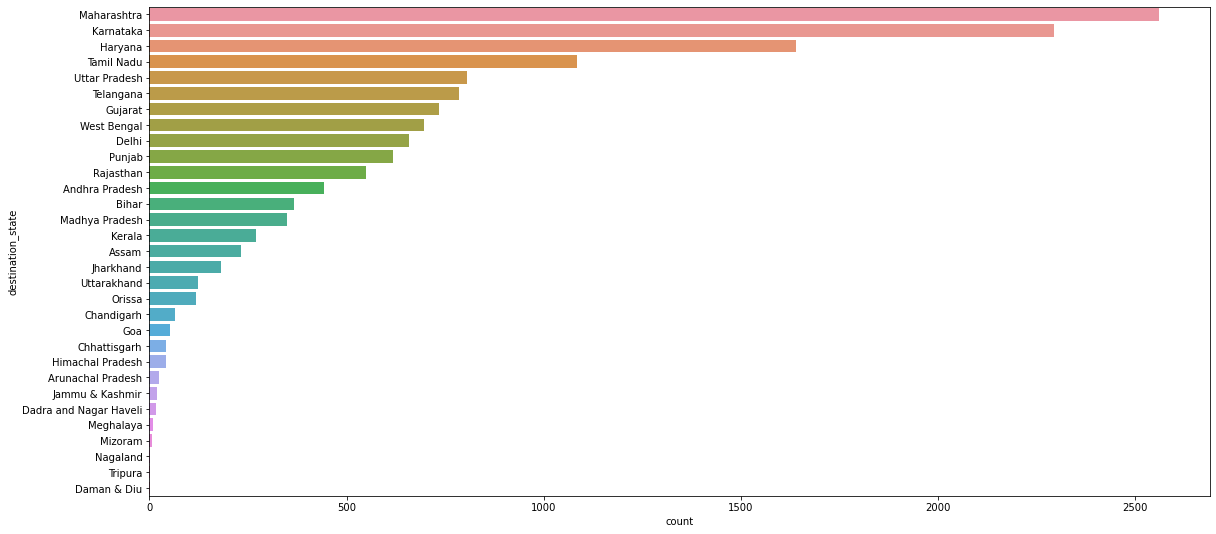

In [45]:
plt.figure(figsize=(19,9))
sns.countplot(y='destination_state', data=trip, order = trip['destination_state'].value_counts().index)

#### MH, KA and HR are the states which have most shipments.

### City

In [46]:
len(trip['source_city'].unique())

713

<AxesSubplot:xlabel='count', ylabel='source_city'>

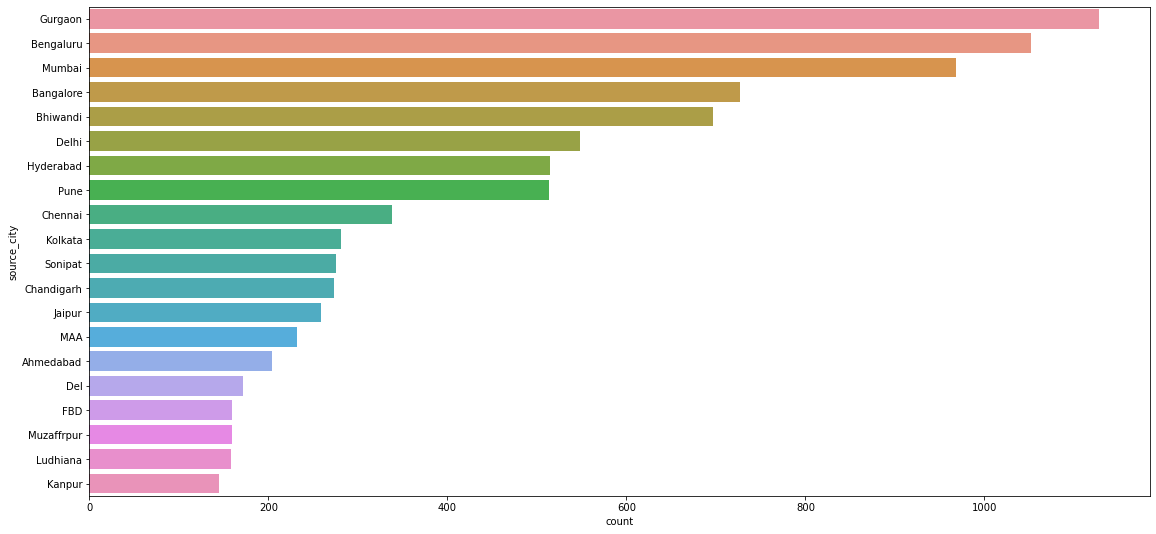

In [47]:
plt.figure(figsize=(19,9))
sns.countplot(y='source_city', data=trip, order = trip['source_city'].value_counts().index[:20])

#### Bangalore + Bengaluru is has the highest source orders followed by Guragon & Mumbai.

<AxesSubplot:xlabel='count', ylabel='destination_city'>

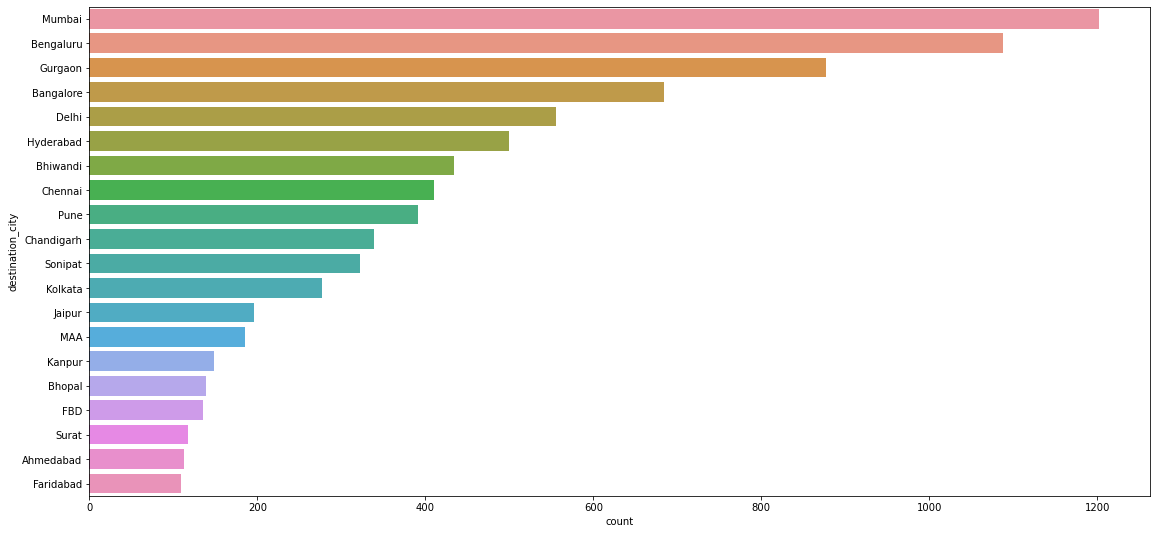

In [48]:
plt.figure(figsize=(19,9))
sns.countplot(y='destination_city', data=trip, order = trip['destination_city'].value_counts().index[:20])

#### Bangalore + Bengaluru is has the highest source orders followed by Mumbai & Guragon.

### Trip Date Time

<AxesSubplot:xlabel='count', ylabel='trip_creation_hour'>

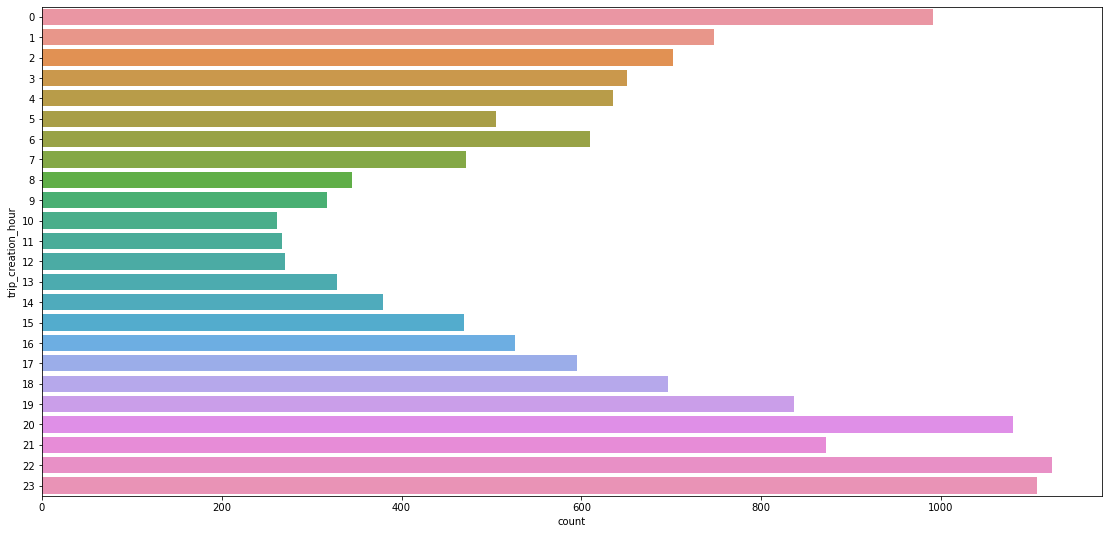

In [49]:
plt.figure(figsize=(19,9))
sns.countplot(y='trip_creation_hour', data=trip)

#### The least amount of trips are created during the morning time, most of the operations happen after noon till midnight.

<AxesSubplot:xlabel='trip_creation_day', ylabel='count'>

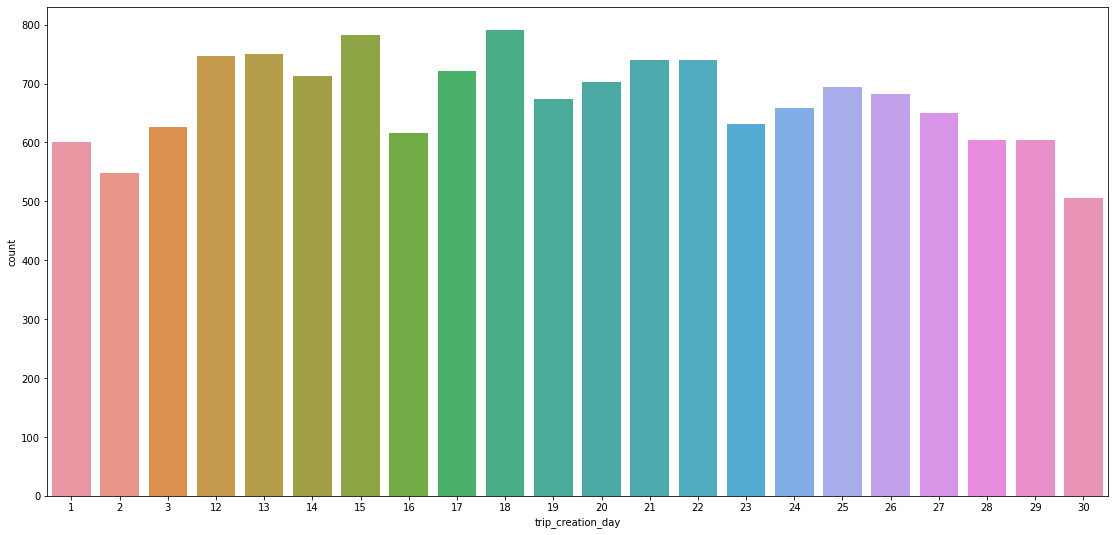

In [50]:
plt.figure(figsize=(19,9))
sns.countplot(x='trip_creation_day', data=trip)

#### Trip creation reduced toward the end of the month

<AxesSubplot:xlabel='count', ylabel='trip_creation_month_name'>

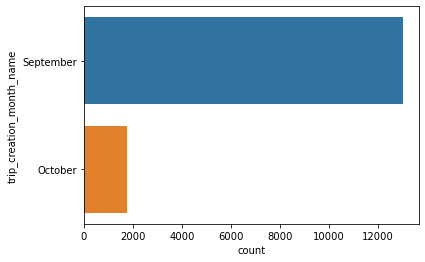

In [51]:
sns.countplot(y='trip_creation_month_name', data=trip)

#### The whole data is of only two months and in that also more data is from September.

<AxesSubplot:xlabel='count', ylabel='trip_creation_week'>

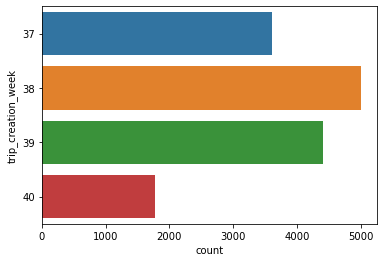

In [52]:
sns.countplot(y='trip_creation_week', data=trip)

<AxesSubplot:xlabel='count', ylabel='trip_creation_dayofweek'>

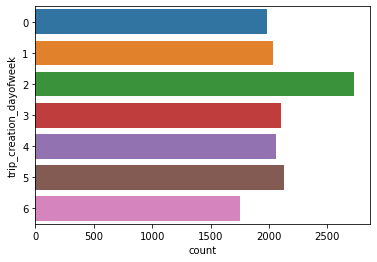

In [53]:
sns.countplot(y='trip_creation_dayofweek', data=trip)

#### Highest number of trips are created on 3rd day of the week.

### Busiest Corridors

In [54]:
trip.groupby(["source_state", "destination_state"]).size().reset_index(name="trips").sort_values(by='trips', ascending=False).head(20)

,source_state,destination_state,trips
88,Maharashtra,Maharashtra,2453
65,Karnataka,Karnataka,2057
114,Tamil Nadu,Tamil Nadu,1021
42,Haryana,Haryana,945
123,Telangana,Telangana,689
32,Gujarat,Gujarat,629
140,West Bengal,West Bengal,615
130,Uttar Pradesh,Uttar Pradesh,592
110,Rajasthan,Rajasthan,453
0,Andhra Pradesh,Andhra Pradesh,414


In [55]:
trip.groupby(["source_city", "destination_city"]).size().reset_index(name="trips").sort_values(by='trips', ascending=False).head(20)

,source_city,destination_city,trips
1168,Mumbai,Mumbai,675
211,Bengaluru,Bengaluru,581
155,Bangalore,Bengaluru,481
274,Bhiwandi,Mumbai,437
210,Bengaluru,Bangalore,402
755,Hyderabad,Hyderabad,355
1165,Mumbai,Bhiwandi,270
1337,Pune,Pune,241
638,Gurgaon,Delhi,241
378,Chennai,Chennai,223


### Remove outliers using IQR method

<AxesSubplot:>

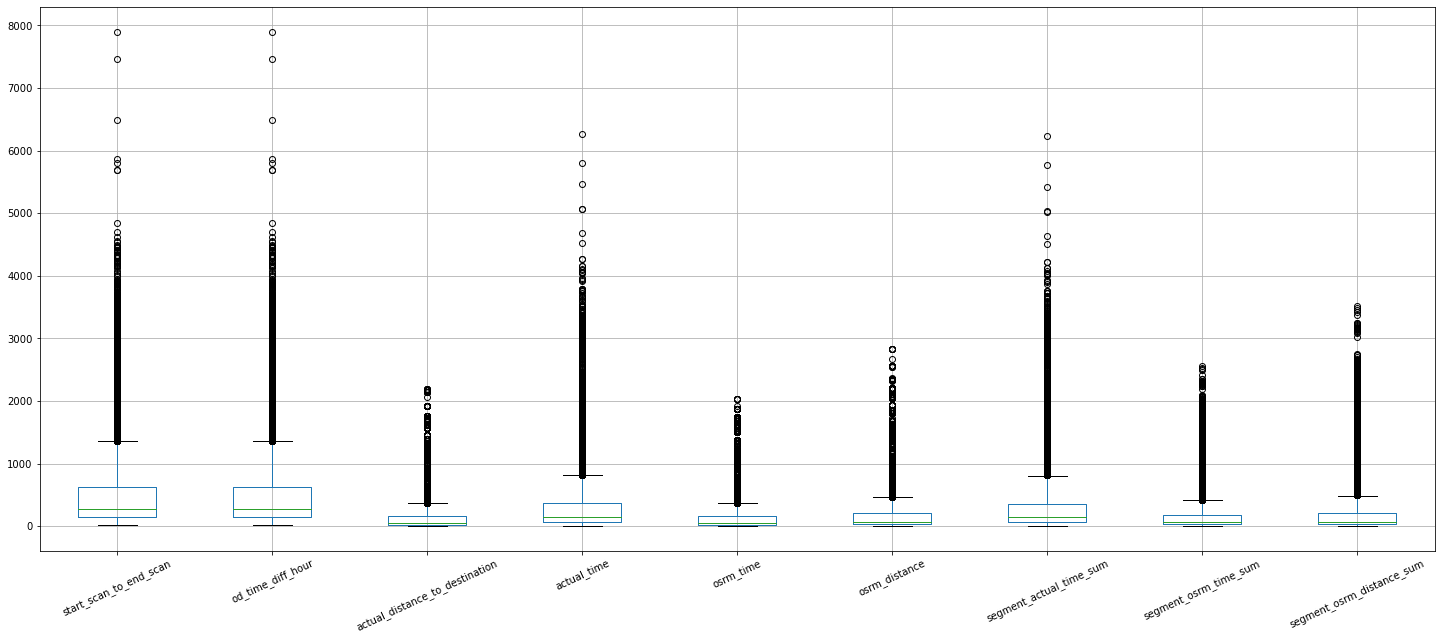

In [56]:
num_cols = ['start_scan_to_end_scan', 'od_time_diff_hour', 'actual_distance_to_destination', 'actual_time', 'osrm_time',
            'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_time_sum', 'segment_osrm_distance_sum']
trip[num_cols].boxplot(figsize=(25,10), rot=25)

In [57]:
q1 = trip[num_cols].quantile(0.25)
q3 = trip[num_cols].quantile(0.75)
iqr = q3 - q1
(((trip[num_cols] >= q1 - 1.5*iqr) & (trip[num_cols] <= q3 + 1.5*iqr)).all(axis=1)).value_counts()

True     12723
False     2064
dtype: int64

In [58]:
trip = trip[((trip[num_cols] >= q1 - 1.5*iqr) & (trip[num_cols] <= q3 + 1.5*iqr)).any(axis=1)]
trip.reset_index(drop=True, inplace=True)
trip.shape

(13770, 29)

<AxesSubplot:>

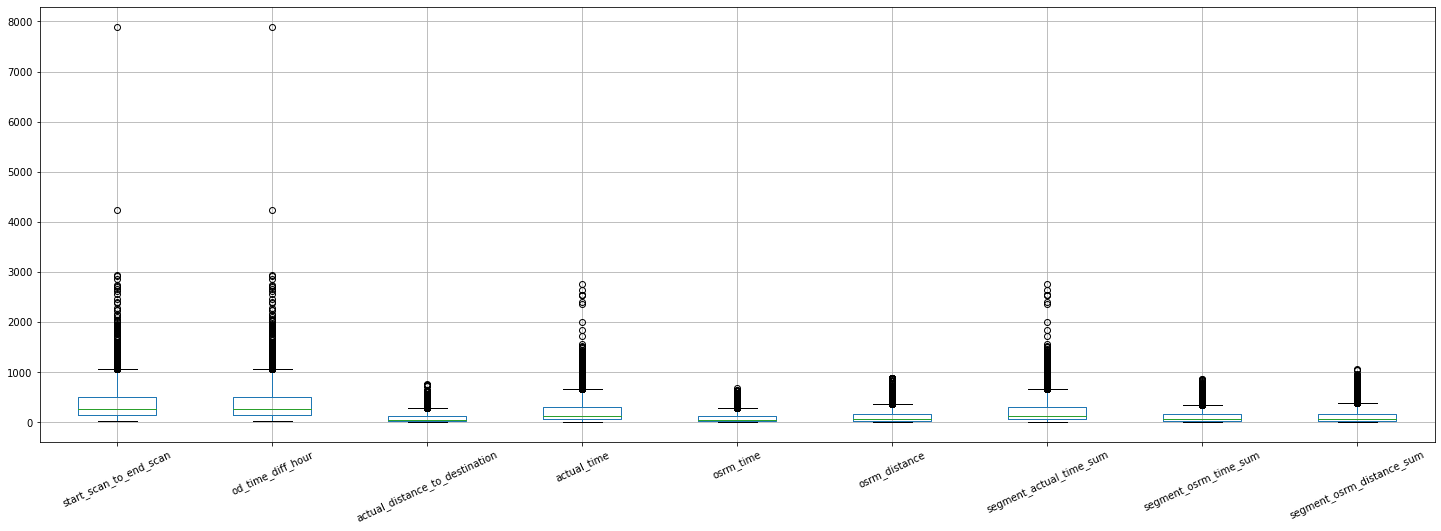

In [59]:
trip[num_cols].boxplot(figsize=(25,8), rot=25)

## Hypothesis Testing

In [60]:
trip.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,source_city,destination_state,destination_city,trip_creation_month_name,trip_creation_month,trip_creation_year,trip_creation_day,trip_creation_hour,trip_creation_dayofweek,trip_creation_week
0,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,...,Doddablpur,Karnataka,Doddablpur,September,9,2018,12,0,2,37
1,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,...,Mumbai,Maharashtra,Mumbai,September,9,2018,12,0,2,37
2,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,...,Bellary,Karnataka,Sandur,September,9,2018,12,0,2,37
3,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,trip-153671055416136166,IND600056AAA,Chennai_Poonamallee (Tamil Nadu),IND600056AAA,Chennai_Poonamallee (Tamil Nadu),189.0,...,Chennai,Tamil Nadu,Chennai,September,9,2018,12,0,2,37
4,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,trip-153671066201138152,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),98.0,...,Chennai,Tamil Nadu,Chennai,September,9,2018,12,0,2,37


### od_time_diff_hour vs start_scan_to_end_scan

<AxesSubplot:>

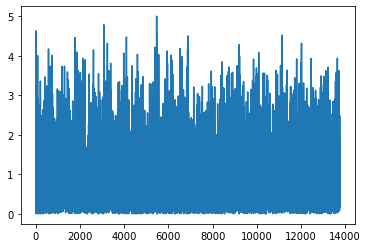

In [61]:
trip['duration_diff'] = trip['od_time_diff_hour'] - trip['start_scan_to_end_scan'] 
trip['duration_diff'].plot()

In [62]:
trip.describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,13770.0,389.004866,358.385672,23.000000,143.000000,255.000000,508.750000,7898.000000
od_time_diff_hour,13770.0,389.887923,358.701488,23.461468,143.549659,255.831917,510.248212,7898.551955
actual_distance_to_destination,13770.0,92.003643,106.573895,9.002461,21.839017,42.124529,128.823404,769.326535
actual_time,13770.0,231.222077,252.718941,9.000000,64.000000,130.000000,304.000000,2764.000000
osrm_time,13770.0,98.091358,105.235220,6.000000,28.000000,54.000000,133.000000,679.000000
osrm_distance,13770.0,117.016812,133.689773,9.072900,29.414150,54.476900,164.563150,883.588200
segment_actual_time_sum,13770.0,229.262890,251.361182,9.000000,63.000000,129.000000,300.000000,2762.000000
segment_osrm_time_sum,13770.0,107.861656,117.801205,6.000000,29.000000,59.000000,154.000000,867.000000
segment_osrm_distance_sum,13770.0,125.165480,143.222721,9.072900,30.849125,61.989300,171.419000,1061.238100
trip_creation_month,13770.0,9.119680,0.324599,9.000000,9.000000,9.000000,9.000000,10.000000


#### There is an average difference in duration of 0.88 hour

#### Outlier Detection & Removal

C:\Users\Shriya Mutyal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='od_time_diff_hour'>

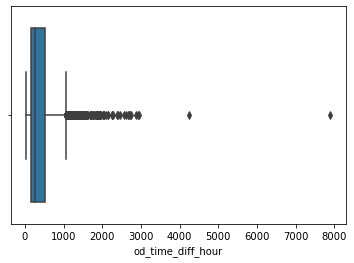

In [63]:
sns.boxplot(trip['od_time_diff_hour'])

C:\Users\Shriya Mutyal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='start_scan_to_end_scan'>

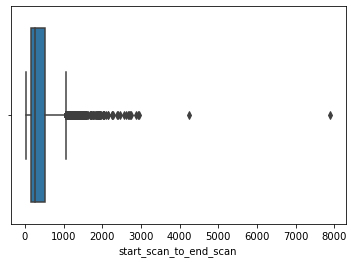

In [64]:
sns.boxplot(trip['start_scan_to_end_scan'])

C:\Users\Shriya Mutyal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration_diff'>

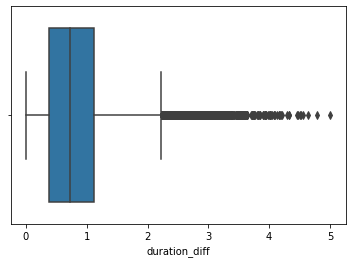

In [65]:
sns.boxplot(trip['duration_diff'])

In [66]:
trip.shape

(13770, 30)

In [67]:
q1 = trip['duration_diff'].quantile(0.25)
q3 = trip['duration_diff'].quantile(0.75)
iqr = q3 - q1
trip = trip[(trip['duration_diff'] >= q1 - 1.5*iqr) & (trip['duration_diff'] <= q3 + 1.5*iqr)]

C:\Users\Shriya Mutyal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration_diff'>

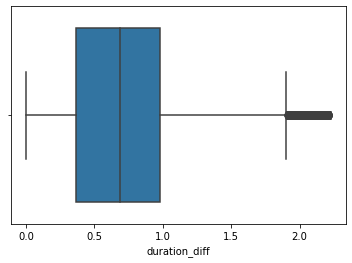

In [68]:
sns.boxplot(trip['duration_diff'])

In [69]:
trip.shape

(12930, 30)

In [70]:
trip.describe()

,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,trip_creation_month,trip_creation_year,trip_creation_day,trip_creation_hour,trip_creation_dayofweek,trip_creation_week,duration_diff
count,12930.000000,12930.000000,12930.000000,12930.000000,12930.000000,12930.000000,12930.000000,12930.000000,12930.000000,12930.000000,12930.0,12930.000000,12930.000000,12930.000000,12930.000000,12930.000000
mean,362.723125,363.481654,83.900514,212.786311,89.312452,106.617319,210.966667,98.635112,114.497556,9.119799,2018.0,18.379814,12.384300,2.923589,38.292885,0.758530
std,341.969077,342.165352,102.320260,241.298507,99.680405,128.079400,239.986671,112.328648,137.794974,0.324739,0.0,7.882518,7.953873,1.926737,0.967723,0.510818
min,23.000000,23.461468,9.002461,9.000000,6.000000,9.072900,9.000000,6.000000,9.072900,9.000000,2018.0,1.000000,0.000000,0.000000,37.000000,0.000240
25%,137.000000,137.806557,21.476637,62.000000,27.000000,28.536900,61.000000,28.000000,29.635900,9.000000,2018.0,14.000000,5.000000,1.000000,38.000000,0.363525
50%,237.000000,237.957216,39.052417,117.000000,50.000000,49.413550,116.000000,54.000000,54.780550,9.000000,2018.0,19.000000,14.000000,3.000000,38.000000,0.691175
75%,455.000000,456.008973,106.229851,267.000000,114.000000,135.895275,264.000000,132.000000,145.085375,9.000000,2018.0,25.000000,20.000000,5.000000,39.000000,0.979305
max,7898.000000,7898.551955,769.326535,2764.000000,679.000000,883.588200,2762.000000,867.000000,1061.238100,10.000000,2018.0,30.000000,23.000000,6.000000,40.000000,2.224872


#### Normality Check

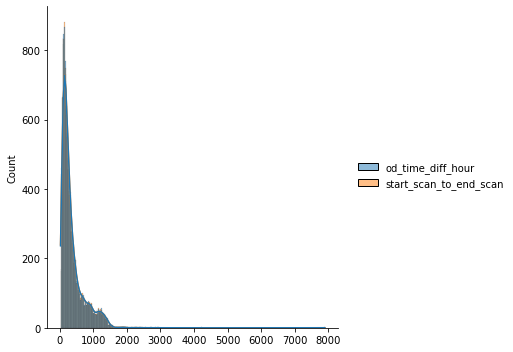

In [71]:
sns.displot(trip[['od_time_diff_hour', 'start_scan_to_end_scan']], kde=True)

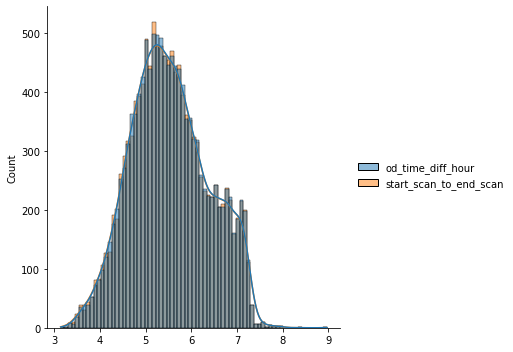

In [72]:
sns.displot(np.log(trip[['od_time_diff_hour', 'start_scan_to_end_scan']]), kde=True)

#### T-test
    H0: There is no difference in od_time_diff_hour and start_scan_to_end_scan.
    Ha: There is a difference in od_time_diff_hour and start_scan_to_end_scan.

In [75]:
from scipy.stats import ttest_ind, probplot, boxcox, yeojohnson

In [76]:
ttest_ind(np.log(trip['od_time_diff_hour']), np.log(trip['start_scan_to_end_scan']), equal_var=True, alternative='greater') # 1 sided

Ttest_indResult(statistic=0.3243719132625903, pvalue=0.37282955245501515)

#### Inferences:
    Considering an alpha value of 0.05, the p-value of 0.37 is greater than alpha. Hence we fail to reject the null hypothesis, H0
    Therefore, there is no difference in od_time_diff_hour and start_scan_to_end_scan.

### actual_time vs osrm_time

C:\Users\Shriya Mutyal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='actual_time'>

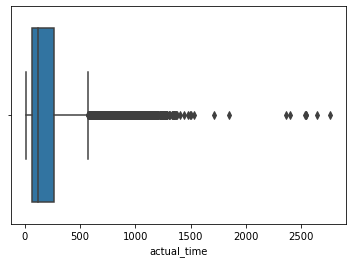

In [77]:
sns.boxplot(trip['actual_time'])

C:\Users\Shriya Mutyal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='actual_time'>

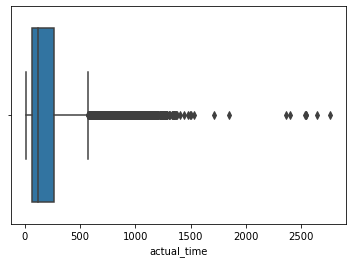

In [78]:
sns.boxplot(trip['actual_time'])

In [79]:
# time = trip[['actual_time', 'osrm_time', 'segment_actual_time_sum', 'segment_osrm_time_sum']]
trip['time_diff'] = trip['actual_time'] - trip['osrm_time']

C:\Users\Shriya Mutyal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time_diff'>

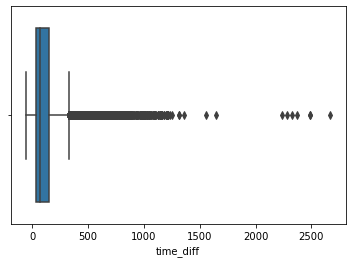

In [80]:
sns.boxplot(trip['time_diff'])

#### Outlier Removal

C:\Users\Shriya Mutyal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time_diff'>

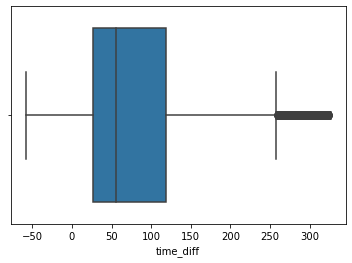

In [81]:
q1 = trip['time_diff'].quantile(0.25)
q3 = trip['time_diff'].quantile(0.75)
iqr = q3 - q1
trip = trip[(trip['time_diff'] >= q1 - 1.5*iqr) & (trip['time_diff'] <= q3 + 1.5*iqr)]
sns.boxplot(trip['time_diff'])

#### Normality Check

In [82]:
boxcox(trip['actual_time'])[1]

-0.02063692359944592

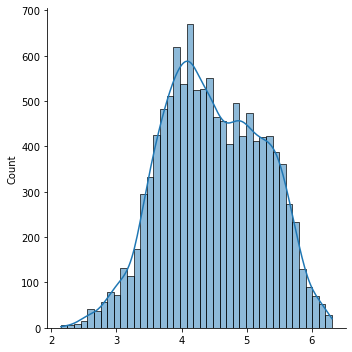

In [83]:
sns.displot(boxcox(trip['actual_time'])[0], kde=True)

#### T-test
    H0: There is no difference in actual_time and osrm_time.
    Ha: There is a difference in actual_time and osrm_time.

In [84]:
ttest_ind(np.log(trip['actual_time']), np.log(trip['osrm_time']), equal_var=False, alternative='greater') # 1 sided

Ttest_indResult(statistic=72.23696473516847, pvalue=0.0)

#### Inferences:
    Considering an alpha value of 0.05, the p-value of 0 is less than alpha. Hence we reject the null hypothesis, H0
    Therefore, there is a difference in actual_time and osrm_time.

### actual_time vs segment_actual_time_sum

In [85]:
trip.shape

(11823, 31)

C:\Users\Shriya Mutyal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time_diff'>

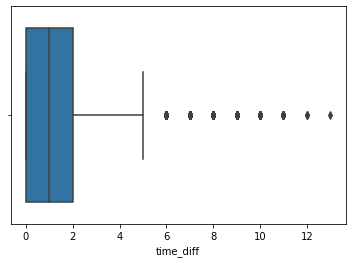

In [86]:
trip['time_diff'] = trip['actual_time'] - trip['segment_actual_time_sum']
sns.boxplot(trip['time_diff'])

#### Outlier Removal

C:\Users\Shriya Mutyal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time_diff'>

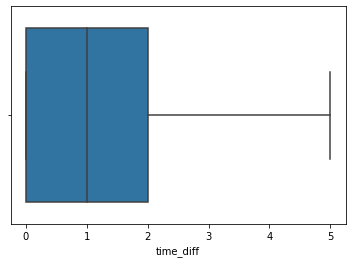

In [87]:
q1 = trip['time_diff'].quantile(0.25)
q3 = trip['time_diff'].quantile(0.75)
iqr = q3 - q1
trip = trip[(trip['time_diff'] >= q1 - 1.5*iqr) & (trip['time_diff'] <= q3 + 1.5*iqr)]
sns.boxplot(trip['time_diff'])

#### Normality Check

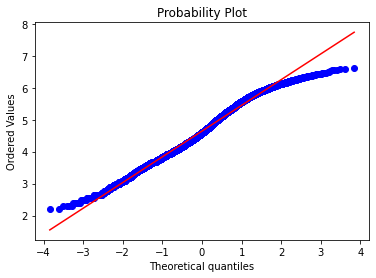

In [88]:
probplot(np.log(trip['actual_time']), dist="norm", plot=plt)
plt.show()

#### T-test:
    H0: There is no difference in actual_time and segment_actual_time_sum.
    Ha: There is a difference in actual_time and segment_actual_time_sum.

In [89]:
trip[['actual_time', 'segment_actual_time_sum']].describe().T

,count,mean,std,min,25%,50%,75%,max
actual_time,11363.0,142.356156,116.649233,9.0,57.0,99.0,196.0,748.0
segment_actual_time_sum,11363.0,141.014609,115.868141,9.0,56.0,98.0,194.0,743.0


In [90]:
ttest_ind(np.log(trip['actual_time']), np.log(trip['segment_actual_time_sum']), equal_var=True, alternative='greater') # 1 sided

Ttest_indResult(statistic=1.012150553457158, pvalue=0.15573842541302152)

#### Inferences:
    Considering an alpha value of 0.05, the p-value of 0.15 is greater than alpha. Hence we fail to reject the null hypothesis, H0
    Therefore, there is no difference in actual_time and segment_actual_time_sum.

### osrm_time vs segment_osrm_time_sum

In [91]:
trip.shape

(11363, 31)

C:\Users\Shriya Mutyal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time_diff'>

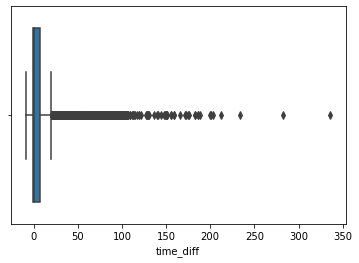

In [92]:
trip['time_diff'] = trip['segment_osrm_time_sum'] - trip['osrm_time']
sns.boxplot(trip['time_diff'])

#### Outlier Removal

C:\Users\Shriya Mutyal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time_diff'>

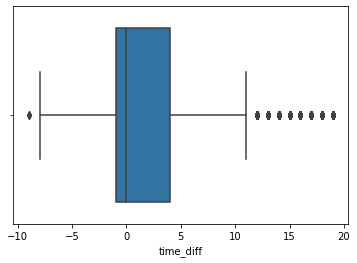

In [93]:
q1 = trip['time_diff'].quantile(0.25)
q3 = trip['time_diff'].quantile(0.75)
iqr = q3 - q1
trip = trip[(trip['time_diff'] >= q1 - 1.5*iqr) & (trip['time_diff'] <= q3 + 1.5*iqr)]
sns.boxplot(trip['time_diff'])

#### Normality Check

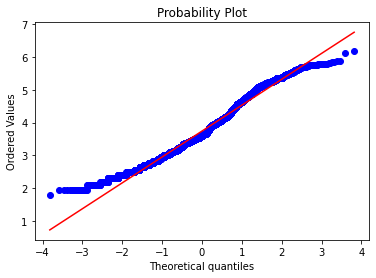

In [94]:
probplot(np.log(trip['osrm_time']), dist="norm", plot=plt)
plt.show()

#### T-test:
    H0: There is no difference in osrm_time and segment_osrm_time_sum.
    Ha: There is a difference in osrm_time and segment_osrm_time_sum.

In [95]:
trip[['segment_osrm_time_sum', 'osrm_time']].describe().T

,count,mean,std,min,25%,50%,75%,max
segment_osrm_time_sum,10267.0,61.258596,56.388433,6.0,24.0,40.0,73.0,501.0
osrm_time,10267.0,59.044706,55.410927,6.0,23.0,37.0,69.0,489.0


In [96]:
ttest_ind(np.log(trip['osrm_time']), np.log(trip['segment_actual_time_sum']), equal_var=True) # 2 tailed

Ttest_indResult(statistic=-73.11361793794974, pvalue=0.0)

#### Inferences:
    Considering an alpha value of 0.05, the p-value of 0 is less than alpha. Hence we reject the null hypothesis, H0
    Therefore, there is difference in osrm_time and segment_osrm_time_sum.

### osrm_distance vs segment_osrm_distance_sum

In [97]:
trip['distance_diff'] = trip['segment_osrm_distance_sum'] - trip['osrm_distance']
trip[['osrm_distance', 'segment_osrm_distance_sum', 'distance_diff']].head()

,osrm_distance,segment_osrm_distance_sum,distance_diff
0,85.1110,84.1894,-0.9216
1,19.6800,19.8766,0.1966
2,146.7918,146.7919,0.0001
3,28.0647,28.0647,0.0000
4,12.0184,12.0184,0.0000


#### Outlier Detection & Removal

<AxesSubplot:>

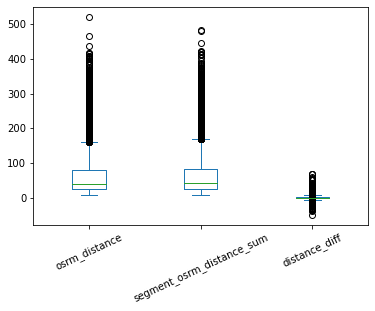

In [98]:
trip[['osrm_distance', 'segment_osrm_distance_sum', 'distance_diff']].plot(kind='box', rot=25)

<AxesSubplot:>

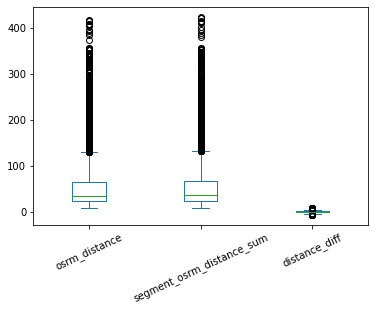

In [99]:
q1 = trip['distance_diff'].quantile(0.25)
q3 = trip['distance_diff'].quantile(0.75)
iqr = q3 - q1
trip = trip[(trip['distance_diff'] >= q1 - 1.5*iqr) & (trip['distance_diff'] <= q3 + 1.5*iqr)]
trip[['osrm_distance', 'segment_osrm_distance_sum', 'distance_diff']].plot(kind='box', rot=25)

In [100]:
trip.shape

(8631, 32)

#### Normality Check

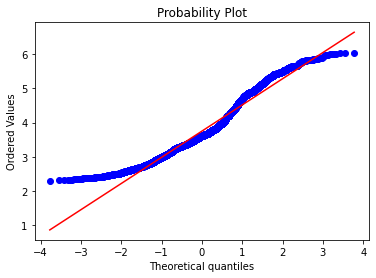

In [101]:
probplot(np.log1p(trip['osrm_distance']), dist="norm", plot=plt)
plt.show()

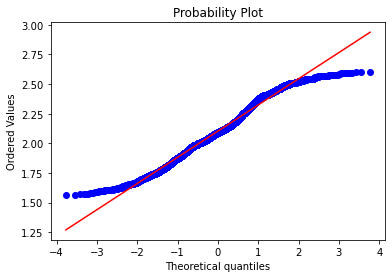

In [102]:
probplot(boxcox(trip['osrm_distance'])[0], dist="norm", plot=plt)
plt.show()

#### T-test:
    H0: There is no difference in osrm_distance and segment_osrm_distance_sum.
    Ha: There is a difference in osrm_distance and segment_osrm_distance_sum.

In [103]:
trip[['osrm_distance', 'segment_osrm_distance_sum', 'distance_diff']].describe().T

,count,mean,std,min,25%,50%,75%,max
osrm_distance,8631.0,59.027132,59.824305,9.0729,24.0684,35.9510,66.82280,417.0608
segment_osrm_distance_sum,8631.0,60.220973,60.017537,9.0729,24.8516,37.5447,68.42155,423.3045
distance_diff,8631.0,1.193841,2.295937,-5.1771,0.0000,0.0001,2.05075,8.6496


In [104]:
ttest_ind(boxcox(trip['osrm_distance'])[0], boxcox(trip['segment_osrm_distance_sum'])[0], equal_var=True) # 2 tailed

Ttest_indResult(statistic=-24.87251406747588, pvalue=3.3745998088011386e-134)

#### Inferences:
    Considering an alpha value of 0.05, the p-value of 3.37e-134 is less than alpha/2 i.e., 0.025. Hence we reject the null hypothesis, H0
    Therefore, there is difference in osrm_distance and segment_osrm_distance_sum.

## Standard Scaler

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
scaler=StandardScaler()
scaler.fit(trip[num_cols])

StandardScaler()

In [108]:
trip[num_cols] = scaler.transform(trip[num_cols])

In [109]:
trip[num_cols]

,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,-0.302775,-0.298157,0.533305,0.253275,0.329919,0.436033,0.245425,0.247789,0.399380
1,-0.681302,-0.681675,-0.604868,-0.594457,-0.754100,-0.657750,-0.587337,-0.748830,-0.672249
2,2.238090,2.239522,1.635916,2.251502,1.332126,1.467125,2.266394,1.264747,1.442511
3,-0.260190,-0.256191,-0.454055,-0.574273,-0.590474,-0.517586,-0.577181,-0.606456,-0.535812
4,-0.690765,-0.693445,-0.768949,-0.947679,-0.795006,-0.785825,-0.942783,-0.809848,-0.803188
...,...,...,...,...,...,...,...,...,...
13762,-0.298043,-0.294352,-0.405004,-0.564181,-0.488208,-0.346709,-0.567025,-0.403065,-0.442912
13763,-0.880029,-0.881778,-0.646326,-0.766022,-0.815459,-0.721881,-0.770138,-0.850526,-0.739450
13764,-0.738081,-0.739730,-0.592981,-0.806390,-0.733647,-0.643933,-0.810760,-0.748830,-0.661753
13766,-0.870566,-0.870342,-0.638630,-0.977955,-0.815459,-0.717792,-0.973250,-0.850526,-0.735372


# Business Insights:
1. Carting to FTL ratio is 60:40 almost. So most of the orders for Carting compared to FTL
2. MH, KA, and HR are the states which have the most shipments.
3. Bangalore + Bengaluru has the highest source orders followed by Gurgaon & Mumbai.
4. Bangalore + Bengaluru has the highest source orders followed by Mumbai & Gurgaon.
5. The least amount of trips are created during the morning time, most of the operations happen afternoon till midnight.
6. There is no difference in od_time_diff_hour and start_scan_to_end_scan.
7. There is a difference between actual_time and osrm_time.
8. There is no difference in actual_time and segment_actual_time_sum.
9. There is a difference in osrm_time and segment_osrm_time_sum.
10. here is a difference in osrm_distance and segment_osrm_distance_sum.

# Recommendations:
1. Reach can be increased in North East as there are very few orders coming from there.
2. Top 5 cities are getting decent order flow, the next 5 cities can be brought into focus.
3. OSRM time and distance both need to be tracked more efficiently.
4. All the data points need to be refined at the point of collection.
5. City naming needs to be corrected and center naming can be refined.